In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from urllib.parse import urlparse
import spacy

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading in cleaned dataset
df = pd.read_csv('../datasets/cleaned_comics_data.csv')
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,clean_text,title_length,post_length,title_word_count,post_word_count,post_has_text
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,weekly discussion thread comics tv and more ap...,hey there honorary justice league members it ’...,weekly discussion thread comics tv and more ap...,98,4827.0,17,355.0,1
1,dead boy detectives megathread,# [***dead boy detectives***] (https://m.media...,DCcomics,12,0.80,dead boy detectives megathread,dead boy detectives \n\n time date april 25 20...,dead boy detectives megathread dead boy detect...,30,1957.0,4,132.0,1
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,comic excerpt tim realizes he 's fallen in lov...,NaN,comic excerpt tim realizes he 's fallen in lov...,80,0.0,13,0.0,0
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,comic excerpt bros really thought they could d...,NaN,comic excerpt bros really thought they could d...,119,0.0,20,0.0,0
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,discussion it ’s donna troy ’s birthday say so...,artist,discussion it ’s donna troy ’s birthday say so...,69,86.0,10,2.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1675 non-null   object 
 1   post              841 non-null    object 
 2   subreddit         1675 non-null   object 
 3   up_votes          1675 non-null   int64  
 4   up_vote_ratio     1675 non-null   float64
 5   clean_title       1675 non-null   object 
 6   clean_post        829 non-null    object 
 7   clean_text        1675 non-null   object 
 8   title_length      1675 non-null   int64  
 9   post_length       1675 non-null   float64
 10  title_word_count  1675 non-null   int64  
 11  post_word_count   1675 non-null   float64
 12  post_has_text     1675 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 170.2+ KB


In [7]:
df.shape

(1675, 13)

In [8]:
df['subreddit'].value_counts()

subreddit
DCcomics    844
Marvel      831
Name: count, dtype: int64

In [9]:
df['subreddit'].value_counts(normalize = True)

subreddit
DCcomics    0.503881
Marvel      0.496119
Name: proportion, dtype: float64

In [10]:
df.groupby('subreddit').mean('up_votes').reset_index()

,subreddit,up_votes,up_vote_ratio,title_length,post_length,title_word_count,post_word_count,post_has_text
0,DCcomics,66.607820,0.723021,62.496445,307.990521,10.719194,51.951422,0.550948
1,Marvel,197.277978,0.739410,59.695548,214.832732,10.509025,33.684717,0.452467


In [11]:
df.groupby('subreddit').median('up_votes').reset_index()

,subreddit,up_votes,up_vote_ratio,title_length,post_length,title_word_count,post_word_count,post_has_text
0,DCcomics,10.0,0.80,54.0,65.5,9.0,11.0,1.0
1,Marvel,7.0,0.81,48.0,0.0,9.0,0.0,0.0


In [12]:
df.groupby('subreddit').describe().T

subreddit                   DCcomics        Marvel
up_votes         count    844.000000    831.000000
                 mean      66.607820    197.277978
                 std      163.837300    781.006884
                 min        0.000000      0.000000
                 25%        1.000000      1.000000
                 50%       10.000000      7.000000
                 75%       60.000000     52.000000
                 max     2060.000000   9240.000000
up_vote_ratio    count    844.000000    831.000000
                 mean       0.723021      0.739410
                 std        0.240164      0.238657
                 min        0.080000      0.060000
                 25%        0.540000      0.570000
                 50%        0.800000      0.810000
                 75%        0.940000      0.950000
                 max        1.000000      1.000000
title_length     count    844.000000    831.000000
                 mean      62.496445     59.695548
                 std       38.876862     43.522269
                 min        7.000000      5.000000
                 25%       35.000000     32.000000
                 50%       54.000000     48.000000
                 75%       78.250000     74.000000
                 max      300.000000    299.000000
post_length      count    844.000000    831.000000
                 mean     307.990521    214.832732
                 std     1098.140753    779.420957
                 min        0.000000      0.000000
                 25%        0.000000      0.000000
                 50%       65.500000      0.000000
                 75%      296.500000    221.000000
                 max    23210.000000  11770.000000
title_word_count count    844.000000    831.000000
                 mean      10.719194     10.509025
                 std        6.874269      7.865104
                 min        1.000000      1.000000
                 25%        6.000000      5.000000
                 50%        9.000000      9.000000
                 75%       13.000000     13.000000
                 max       55.000000     55.000000
post_word_count  count    844.000000    831.000000
                 mean      51.951422     33.684717
                 std      177.621778    108.406839
                 min        0.000000      0.000000
                 25%        0.000000      0.000000
                 50%       11.000000      0.000000
                 75%       53.000000     36.500000
                 max     3767.000000   1802.000000
post_has_text    count    844.000000    831.000000
                 mean       0.550948      0.452467
                 std        0.497692      0.498035
                 min        0.000000      0.000000
                 25%        0.000000      0.000000
                 50%        1.000000      0.000000
                 75%        1.000000      1.000000
                 max        1.000000      1.000000

### There is a big difference in the mean on upvotes, but not in the median. Should investigate the distribution of upvotes.

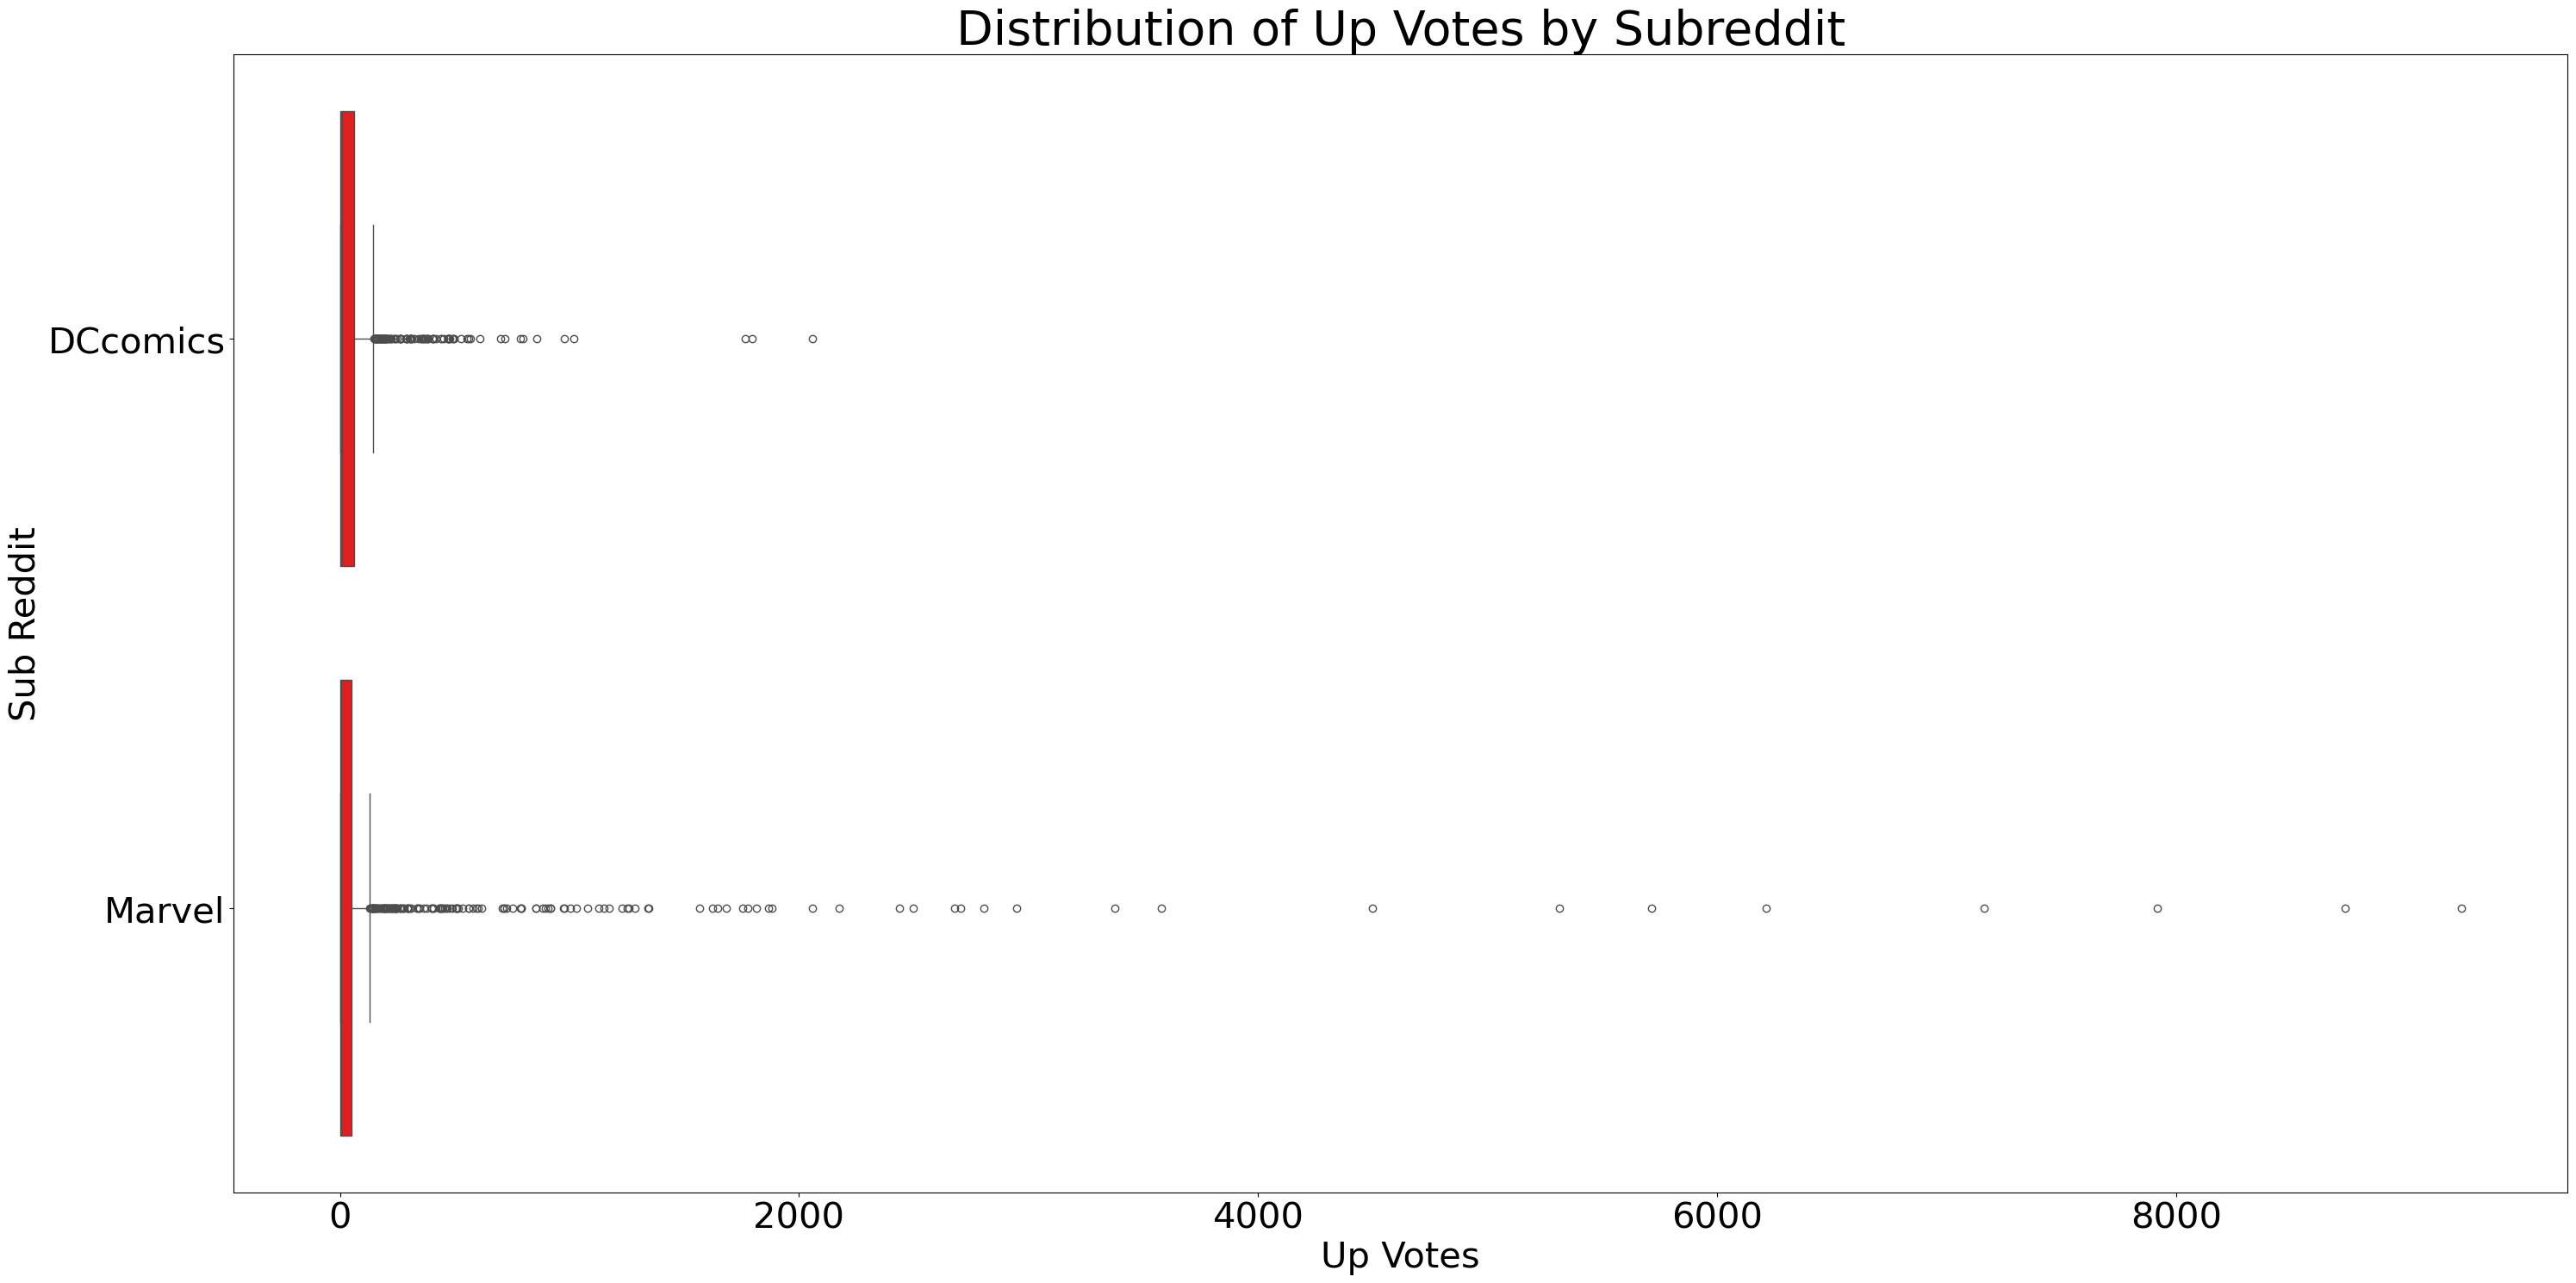

In [13]:
plt.figure(figsize = (30, 15))

sns.boxplot(x = df['up_votes'],
            y = df['subreddit'], color = 'red')

plt.title('Distribution of Up Votes by Subreddit', size = 40)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.xlabel('Up Votes', size = 30)
plt.ylabel('Sub Reddit', size = 30);

plt.savefig('../images/up_vote_distribution_by_subreddit.png', dpi = 192)
plt.tight_layout();

In [14]:
# Not how I'm looking for the mean vs median

# fig, ax1 = plt.subplots(figsize = (10,10))

# ax2 = ax1.twinx()

# bar_container = ax1.bar(mean_up_votes_df['subreddit'], mean_up_votes_df['up_votes'], label = 'Mean Up Votes', color = 'red')
# bar_container2 = ax1.bar(median_up_votes_df['subreddit'], median_up_votes_df['up_votes'], label = 'Mean Up Votes', color = 'blue')

In [15]:
grouped = df.groupby('subreddit')[['up_votes', 'up_vote_ratio']].agg(['mean', 'median']).reset_index()
grouped

subreddit    up_votes        up_vote_ratio       
                   mean median          mean median
0  DCcomics   66.607820   10.0      0.723021   0.80
1    Marvel  197.277978    7.0      0.739410   0.81

In [16]:
# Deleting column names
grouped.columns = [''] * len(grouped.columns)

#Then creating new column names
colnames = ['subreddit', 'up_votes_mean', 'up_votes_median', 'up_votes_ratio_mean', 'up_votes_ratio_median']

#Then adding the column names back in
grouped.columns = colnames
grouped

,subreddit,up_votes_mean,up_votes_median,up_votes_ratio_mean,up_votes_ratio_median
0,DCcomics,66.607820,10.0,0.723021,0.80
1,Marvel,197.277978,7.0,0.739410,0.81


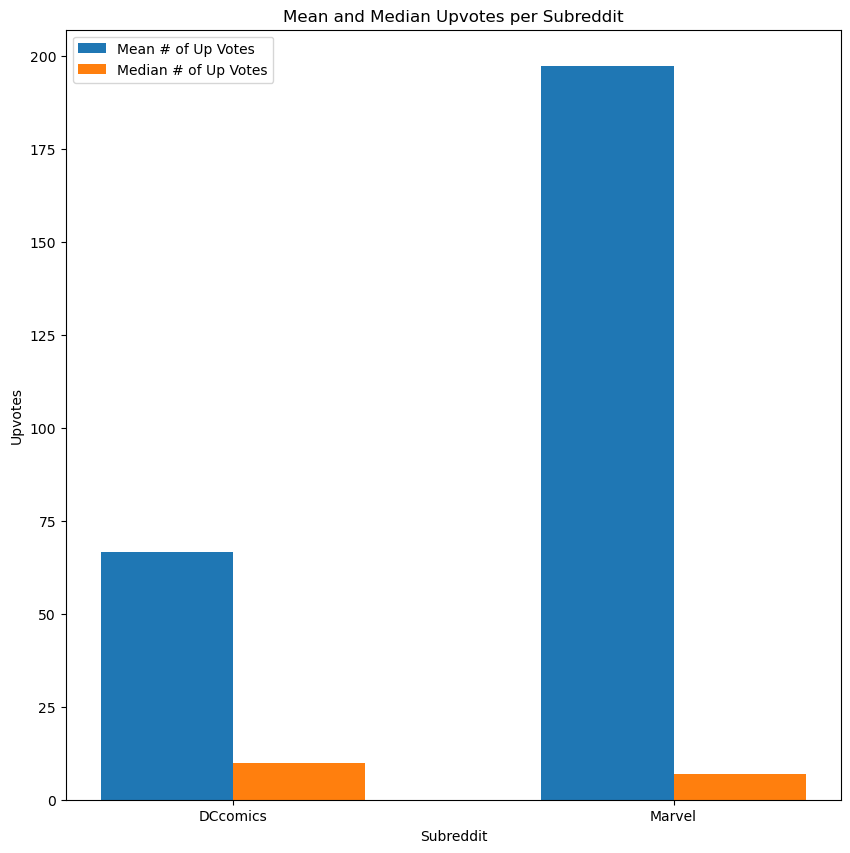

In [17]:
# Had ChatGPT's help with this to create 2 bars for mean and median next to each other
plt.figure(figsize = (10, 10))

bar_width = 0.3

positions = range(len(grouped))

plt.bar(positions, grouped['up_votes_mean'], bar_width, label = 'Mean # of Up Votes')
plt.bar([p + bar_width for p in positions], grouped['up_votes_median'], bar_width, label = 'Median # of Up Votes')

plt.xlabel('Subreddit')
plt.ylabel('Upvotes')
plt.title('Mean and Median Upvotes per Subreddit')
plt.xticks([p + bar_width / 2 for p in positions], grouped['subreddit'])
plt.legend();

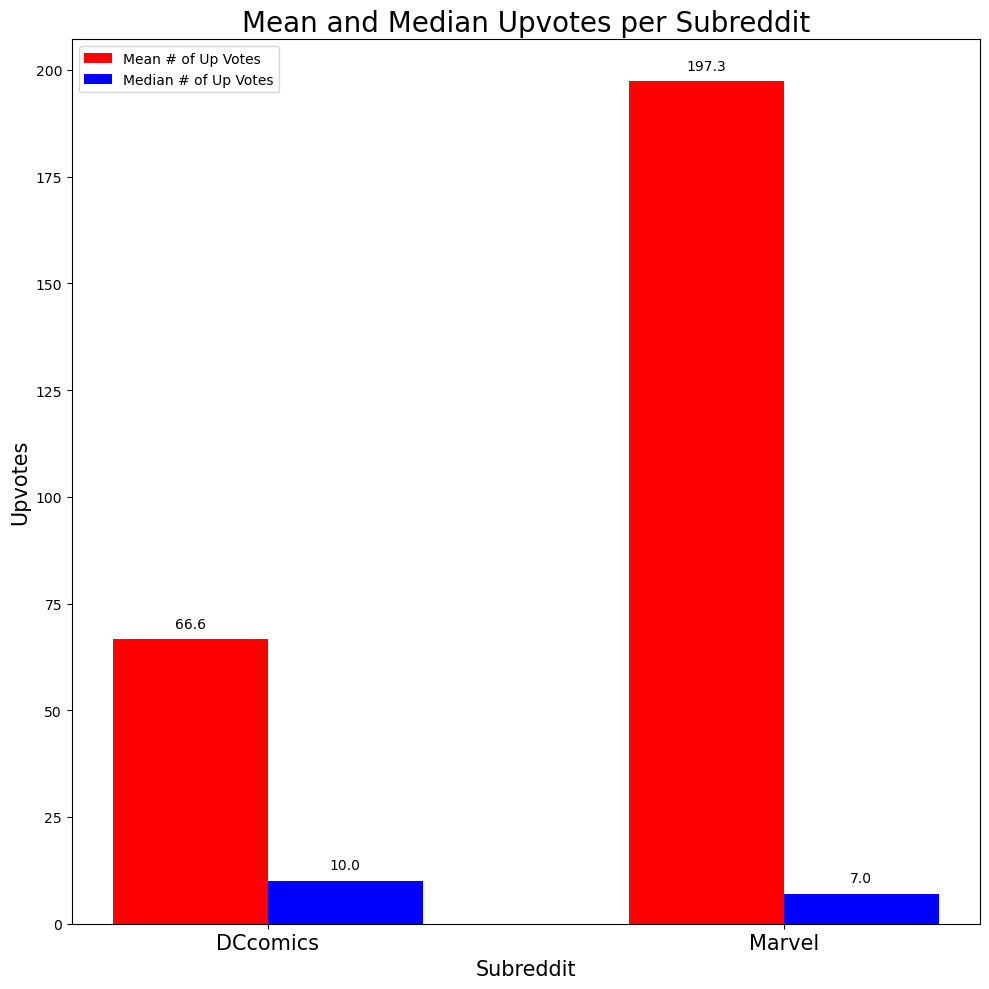

In [19]:
# Now adding the labels onto the data
plt.figure(figsize = (10, 10))

bar_width = 0.3

positions = range(len(grouped))

#Plotting mean values with labels
bars_mean = plt.bar(positions, grouped['up_votes_mean'], bar_width, label = 'Mean # of Up Votes', color = 'red')
for i, bar in enumerate(bars_mean):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, 
             f'{grouped["up_votes_mean"][i]:.1f}',
             ha = 'center', va = 'bottom')

#Plotting median values with labels
bars_median = plt.bar([p + bar_width for p in positions], grouped['up_votes_median'], bar_width, label = 'Median # of Up Votes', color = 'blue')
for i, bar in enumerate(bars_median):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
             f'{grouped["up_votes_median"][i]:.1f}',
             ha = 'center', va = 'bottom')

plt.xlabel('Subreddit', size = 15)
plt.ylabel('Upvotes', size = 15)
plt.title('Mean and Median Upvotes per Subreddit', size = 20)
plt.xticks([p + bar_width / 2 for p in positions], grouped['subreddit'], size = 15)

plt.tight_layout()
plt.savefig('../images/up_votes_by_subreddit.png', dpi = 192)
plt.legend();

In [20]:
# Couldn't figure out how to add mean up vote ratio onto this chart with dual axis and have it appear on the correct axis in height

# #Adding in the Up Vote Percentage
# fig, ax1 = plt.subplots(figsize = (10, 10))
# ax2 = ax1.twinx()

# bar_width = 0.3

# # This is 2 - since there's 2 rows in this data frame (for Marvel & DC)
# positions = range(len(grouped))

# #Plotting mean values with labels
# bars_mean = plt.bar(positions, grouped['up_votes_mean'], bar_width, label = 'Mean # of Up Votes', color = 'lightcoral')
# for i, bar in enumerate(bars_mean):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, 
#              f'{grouped["up_votes_mean"][i]:.1f}',
#              ha = 'center', va = 'bottom')

# #Plotting median values with labels
# bars_median = plt.bar([p + bar_width for p in positions], grouped['up_votes_median'], bar_width, label = 'Median # of Up Votes', color = 'darkred')
# for i, bar in enumerate(bars_median):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
#              f'{grouped["up_votes_median"][i]:.1f}',
#              ha = 'center', va = 'bottom')

# #Plotting Mean_Up_Vote_Ratio
#                 #Making this on ratio #2
# bars_mean_ratio = ax2.bar([p + bar_width *2 for p in positions], grouped['up_votes_ratio_mean'], bar_width, label = 'Mean Up Vote Ratio', color = 'blue')
# for i, bar in enumerate(bars_mean_ratio):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
#              f'{grouped["up_votes_ratio_mean"][i]:.3f}',
#              ha = 'center', va = 'bottom' )

# plt.xlabel('Subreddit', size = 15)
# ax1.set_ylabel('Up Vote Ratio', color = 'blue', size = 15)
# ax2.set_ylabel('Number of Up Votes', color = 'red', size = 15)
# plt.title('Up Votes per Subreddit')
# plt.xticks([p + bar_width / 2 for p in positions], grouped['subreddit'], size = 15)
# plt.legend();

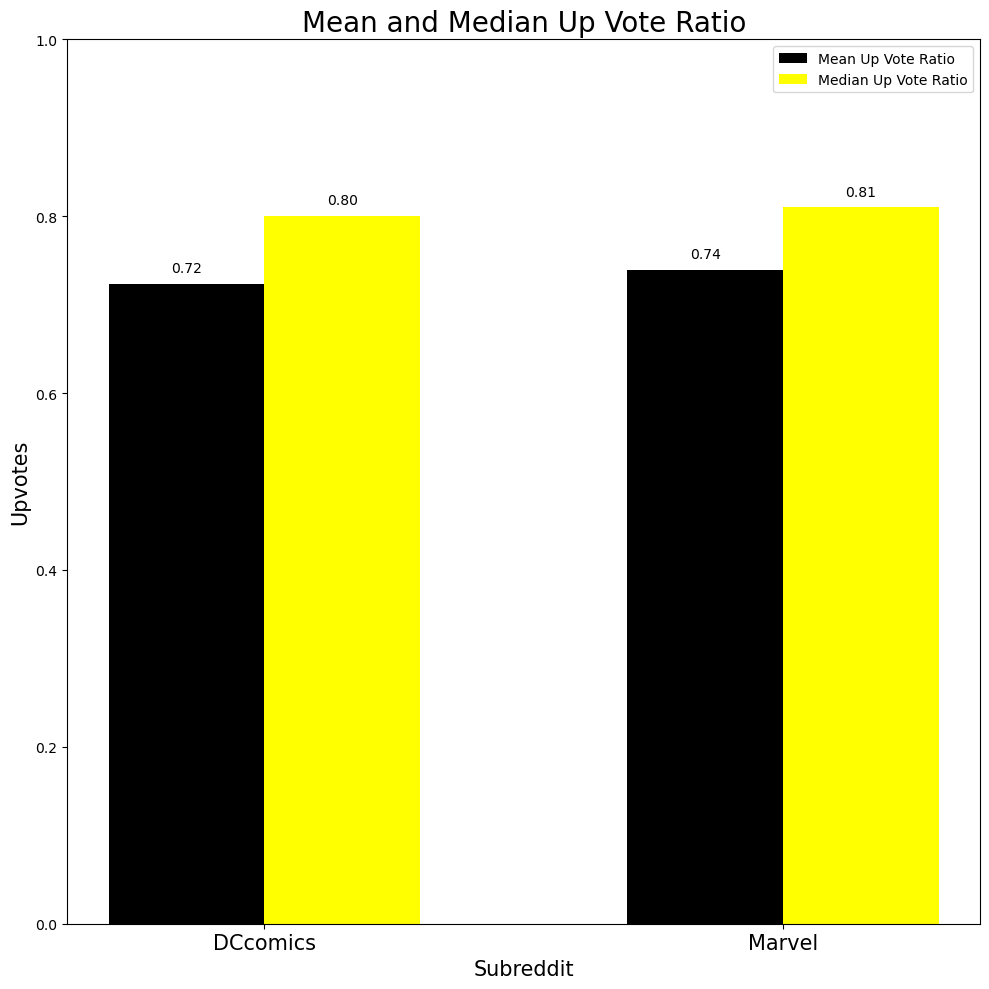

In [22]:
plt.figure(figsize = (10, 10))

bar_width = 0.3

positions = range(len(grouped))

#Plotting mean values with labels
bars_mean = plt.bar(positions, grouped['up_votes_ratio_mean'], bar_width, label = 'Mean Up Vote Ratio', color = 'black')
for i, bar in enumerate(bars_mean):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, # Needed to adjust the label bar height since the scale is in fractions now
             f'{grouped["up_votes_ratio_mean"][i]:.2f}',
             ha = 'center', va = 'bottom')

#Plotting median values with labels
bars_median = plt.bar([p + bar_width for p in positions], grouped['up_votes_ratio_median'], bar_width, label = 'Median Up Vote Ratio', color = 'yellow')
for i, bar in enumerate(bars_median):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f'{grouped["up_votes_ratio_median"][i]:.2f}',
             ha = 'center', va = 'bottom')

plt.xlabel('Subreddit', size = 15)
plt.ylabel('Upvotes', size = 15)
plt.title('Mean and Median Up Vote Ratio', size = 20)
plt.ylim([0,1])
plt.xticks([p + bar_width / 2 for p in positions], grouped['subreddit'], size = 15)

plt.tight_layout()
plt.legend()

plt.savefig('../images/up_vote_ratio_by_subreddit.png', dpi = 192);


In [ ]:
df.head()

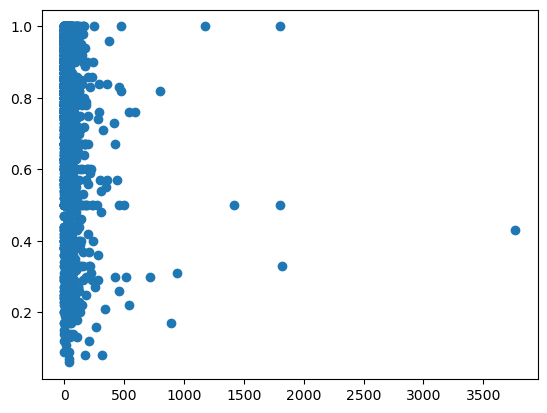

In [23]:
# No clear relationship between word size and up vote ratio
plt.scatter(df['post_word_count'],
            df['up_vote_ratio'],
            )

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1675 non-null   object 
 1   post              841 non-null    object 
 2   subreddit         1675 non-null   object 
 3   up_votes          1675 non-null   int64  
 4   up_vote_ratio     1675 non-null   float64
 5   clean_title       1675 non-null   object 
 6   clean_post        829 non-null    object 
 7   clean_text        1675 non-null   object 
 8   title_length      1675 non-null   int64  
 9   post_length       1675 non-null   float64
 10  title_word_count  1675 non-null   int64  
 11  post_word_count   1675 non-null   float64
 12  post_has_text     1675 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 170.2+ KB


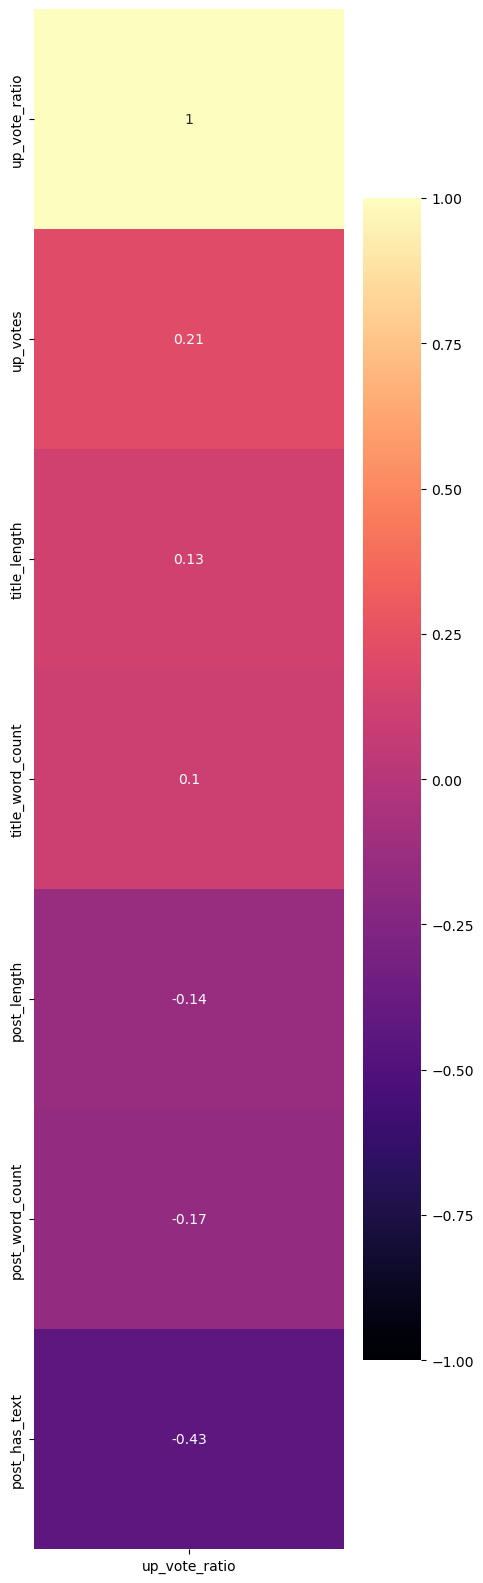

In [25]:
plt.figure(figsize = (5,20))

sns.heatmap(df.corr(numeric_only = True)[['up_vote_ratio']].sort_values(by = 'up_vote_ratio', ascending = False),
            vmin = -1, vmax = 1,
            annot = True, cmap = 'magma');